In [11]:
import csv
import os
import pandas as pd
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB
import joblib
import utilities

import community as community_louvain

# Predicting Year : 2012

### Upload Weighted Temporal Dataset

In [ ]:
### test

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
    
training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

####
#X_WT_train  = X_WT_train.iloc[X_WT_train['label']==1]

####
len(training_WT_df[training_WT_df.iloc[:]['label']==1])

#training_WT_df.loc[training_WT_df['e1'] == 'Date']
#training_WT_df.loc[(training_WT_df['e1'] == 'Date') & (training_WT_df['e2'] == 'var')].iloc[:,2:-1]
#len(training_WT_df)

154636

In [60]:
from networkx.readwrite import json_graph
import json
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/train/Graph.json") as json_data:
    g_2012 = json_graph.node_link_graph(json.load(json_data))
print(len(g_2012.edges()))

95685


In [61]:
from networkx.readwrite import json_graph
import json
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2011/Graph.json") as json_data:
    g_2011 = json_graph.node_link_graph(json.load(json_data))
print(len(g_2011.edges()))

154636


In [62]:
from networkx.readwrite import json_graph
import json
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2010/Graph.json") as json_data:
    g_2010 = json_graph.node_link_graph(json.load(json_data))
print(len(g_2010.edges()))

95685


In [63]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
    
training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

#X_WT_test.head()

In [115]:
#training_WT_df

In [64]:
X_WT_train.shape

(167389, 12)

### Upload Unweighted non-Temporal Dataset

In [65]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
    
training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

#X_non_test.head()

In [117]:
#training_non_df

In [66]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(774519, 16)

In [67]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(254704, 16)

In [17]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape   

(474420, 16)

In [18]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(167389, 16)

In [19]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [20]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [21]:
len(G.nodes())

963

In [22]:
len(H.nodes())

963

In [23]:
len(G.edges())

167389

In [24]:
len(H.edges())

167389

In [25]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

519815

In [26]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2012/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

519815

### Merge Datasets

In [54]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [55]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1 
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  154636
Negative_samples:  12753


### upsample minority class

In [70]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==1]
df_minority = training_df[training_df.label==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=154636,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [56]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)): 
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1", "roc_auc"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions),
                   roc_auc_score(actual, predictions)]
    })

* Find important features

In [57]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm 

### 1. Random Forest

In [58]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 1})

### Train and predict

In [59]:
classifier.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [113]:
prediction = classifier.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [102]:
prediction.shape

(774519,)

In [103]:
np.unique(prediction)

array([0, 1])

In [104]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.634
1,Precision,0.501
2,Recall,0.898
3,FPR,0.520
4,FNR,0.102
5,F1,0.643
6,roc_auc,0.689


'Feature Importance'

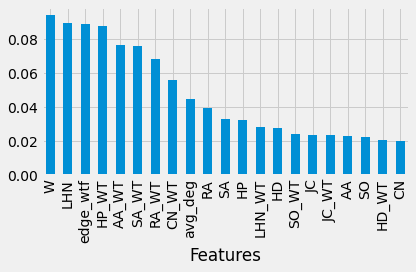

In [16]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg', 
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2012 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2012/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2012 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2012


# Predicting Year : 2013

### Upload Weighted Temporal Dataset

In [27]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,5.052,2.176,736.846,120.079,2.021,1.927,0.986,0.005,20.899,20.899,1.973,1233.500
1,0.755,0.325,450.056,69.905,4.708,1.234,0.978,0.013,8.519,8.519,1.956,994.500
2,1.285,0.554,507.091,81.943,3.434,1.391,0.990,0.009,12.763,12.763,1.980,1140.500
3,2.694,1.160,622.553,102.467,2.355,1.708,0.990,0.006,18.039,18.039,1.980,1193.000
4,2.580,1.111,606.818,99.336,2.445,1.664,0.990,0.007,16.622,16.622,1.981,1175.000


In [28]:
X_WT_train.shape

(254704, 12)

### Upload Unweighted non-Temporal Dataset

In [29]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,1230,150.995,0.999,0.995,0.994,0.001,5.311,5.311,0.997
1,757,86.359,0.999,0.615,0.614,0.001,1.993,1.993,0.761
2,1049,123.736,0.999,0.852,0.851,0.001,3.363,3.363,0.920
3,1150,139.936,0.996,0.934,0.930,0.001,4.722,4.722,0.964
4,1116,134.436,0.997,0.907,0.904,0.001,4.243,4.243,0.950


In [88]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(303579, 16)

In [89]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(303579, 16)

In [90]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(224744, 16)

In [91]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(224744, 16)

In [92]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [93]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [94]:
len(G.nodes())

1237

In [95]:
len(H.nodes())

1237

In [96]:
len(G.edges())

254704

In [97]:
len(H.edges())

254704

In [98]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

918049

In [99]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2013/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

918049

### Merge Datasets

In [32]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [33]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  137429
Negative_samples:  117275


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [34]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [35]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [36]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [37]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [38]:
prediction = classifier.predict(X_test)

In [39]:
prediction.shape

(345528,)

In [40]:
np.unique(prediction)

array([0, 1])

In [41]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.879
1,Precision,0.853
2,Recall,0.971
3,FPR,0.268
4,FNR,0.029
5,F1,0.908


'Feature Importance'

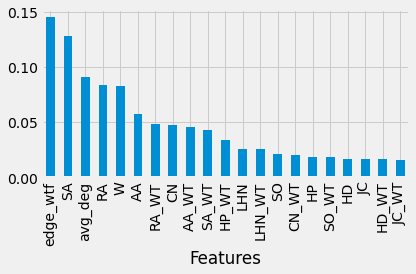

In [57]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2013 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2013/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2013 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2013


# Predicting Year : 2014

### Upload Weighted Temporal Dataset

In [42]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,1.717,0.664,711.175,103.786,2.077,1.889,0.989,0.006,12.375,12.375,1.979,1273.500
1,0.408,0.158,435.832,61.455,4.154,1.273,0.974,0.012,5.460,5.460,1.949,1063.000
2,1.213,0.469,579.564,84.289,2.376,1.693,0.989,0.007,9.822,9.822,1.977,1213.000
3,0.144,0.056,351.379,47.210,10.534,1.026,0.935,0.031,3.360,3.360,1.871,868.500
4,3.307,1.279,606.167,86.695,2.234,1.771,0.988,0.007,10.074,10.074,1.975,1160.000


In [59]:
X_WT_train.shape

(1172753, 12)

### Upload Unweighted non-Temporal Dataset

In [43]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,1133,130.146,0.978,0.816,0.801,0.001,3.192,3.192,0.890
1,822,89.790,0.850,0.709,0.630,0.001,1.591,1.591,0.773
2,1077,122.434,0.929,0.850,0.798,0.001,2.807,2.807,0.888
3,562,60.317,0.972,0.485,0.478,0.001,1.023,1.023,0.647
4,1097,125.643,0.947,0.945,0.897,0.001,3.063,3.063,0.946


In [61]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(1620820, 16)

In [62]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(1620820, 16)

In [63]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(1172753, 16)

In [64]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(1172753, 16)

In [65]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [66]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [67]:
len(G.nodes())

1460

In [68]:
len(H.nodes())

1460

In [69]:
len(G.edges())

345528

In [70]:
len(H.edges())

345528

In [71]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

1275292

In [72]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2014/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

1275292

### Merge Datasets

In [44]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [45]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  212755
Negative_samples:  132773


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [46]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [47]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [48]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [49]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [50]:
prediction = classifier.predict(X_test)

In [51]:
prediction.shape

(569807,)

In [52]:
np.unique(prediction)

array([0, 1])

In [53]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.927
1,Precision,0.911
2,Recall,0.959
3,FPR,0.111
4,FNR,0.041
5,F1,0.934


'Feature Importance'

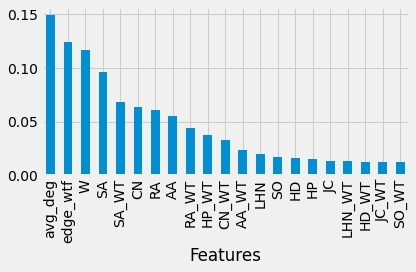

In [83]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2014 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2014/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2014 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2014


# Predicting Year : 2015

### Upload Weighted Temporal Dataset

In [54]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,0.049,0.017,424.449,53.643,39.893,0.854,0.836,0.080,2.925,2.925,1.672,1121.500
1,0.150,0.053,444.948,56.663,16.776,0.895,0.850,0.034,3.222,3.222,1.700,1134.000
2,3.128,1.114,1115.919,155.701,2.245,1.782,0.994,0.004,17.522,17.522,1.987,1736.500
3,4.008,1.428,1373.313,189.456,2.763,1.552,0.994,0.003,21.516,21.516,1.987,1818.500
4,0.044,0.016,418.365,52.631,41.917,0.842,0.825,0.084,2.746,2.746,1.650,1108.000


In [86]:
X_WT_train.shape

(1620820, 12)

### Upload Unweighted non-Temporal Dataset

In [55]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,493,50.029,0.996,0.282,0.282,0.001,0.612,0.612,0.440
1,517,52.643,0.994,0.296,0.295,0.001,0.656,0.656,0.456
2,1651,184.773,0.957,0.945,0.906,0.001,4.036,4.036,0.951
3,1747,197.908,0.999,0.925,0.924,0.001,4.699,4.699,0.961
4,466,47.088,0.996,0.267,0.266,0.001,0.556,0.556,0.421


In [89]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(2515941, 16)

In [90]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(2515941, 16)

In [91]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(1620820, 16)

In [92]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(1620820, 16)

In [93]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [94]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [95]:
len(G.nodes())

1908

In [96]:
len(H.nodes())

1908

In [97]:
len(G.edges())

569807

In [98]:
len(H.edges())

569807

In [99]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

1946134

In [100]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2015/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

1946134

### Merge Datasets

In [56]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [57]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  309360
Negative_samples:  260447


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [58]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [59]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [105]:
classifier = RandomForestClassifie
r(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [60]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [61]:
prediction = classifier.predict(X_test)

In [62]:
prediction.shape

(812808,)

In [63]:
np.unique(prediction)

array([0, 1])

In [64]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.868
1,Precision,0.822
2,Recall,0.983
3,FPR,0.287
4,FNR,0.017
5,F1,0.895


'Feature Importance'

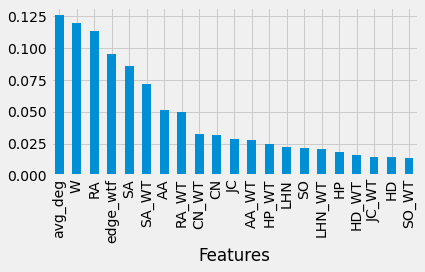

In [111]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2015 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2015/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2015 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2015


# Predicting Year : 2016

### Upload Weighted Temporal Dataset

In [65]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,4.118,1.373,1485.990,196.634,2.066,1.917,0.994,0.003,20.026,20.026,1.988,2127.000
1,6.901,2.300,1870.620,243.511,2.600,1.605,0.992,0.002,23.992,23.992,1.985,2164.000
2,0.070,0.023,657.900,80.068,55.780,0.915,0.900,0.078,4.278,4.278,1.800,1480.500
3,7.119,2.373,1878.366,244.505,2.611,1.600,0.992,0.002,24.105,24.105,1.984,2169.500
4,0.890,0.297,880.866,115.848,5.257,1.224,0.993,0.007,11.022,11.022,1.986,1915.500


In [113]:
X_WT_train.shape

(2515941, 12)

### Upload Unweighted non-Temporal Dataset

In [66]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,2060,225.383,0.976,0.961,0.939,0.000,4.407,4.407,0.969
1,2110,232.846,1.000,0.952,0.951,0.000,4.920,4.920,0.975
2,844,85.072,0.993,0.400,0.399,0.000,0.971,0.971,0.570
3,2110,232.846,1.000,0.947,0.947,0.000,4.920,4.920,0.973
4,1694,180.084,0.985,0.802,0.793,0.000,2.985,2.985,0.884


In [115]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(3460842, 16)

In [116]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(3460842, 16)

In [117]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(2515941, 16)

In [118]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(2515941, 16)

In [119]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [120]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [121]:
len(G.nodes())

2229

In [122]:
len(H.nodes())

2229

In [123]:
len(G.edges())

812808

In [124]:
len(H.edges())

812808

In [125]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

2648034

In [126]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2016/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

2648034

### Merge Datasets

In [67]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [68]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  466354
Negative_samples:  346454


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [69]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [70]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [71]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [72]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [73]:
prediction = classifier.predict(X_test)

In [74]:
prediction.shape

(1193191,)

In [75]:
np.unique(prediction)

array([0, 1])

In [76]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.898
1,Precision,0.919
2,Recall,0.916
3,FPR,0.133
4,FNR,0.084
5,F1,0.918


'Feature Importance'

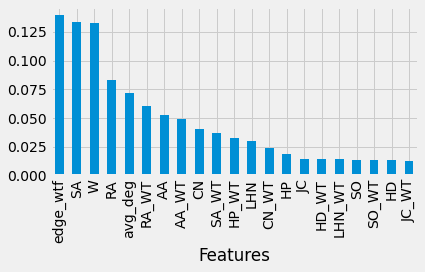

In [137]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2016 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2016/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2016 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2016


# Predicting Year : 2017

### Upload Weighted Temporal Dataset

In [77]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,0.169,0.053,414.854,54.221,6.543,1.161,0.986,0.018,4.840,4.840,1.972,1974.000
1,0.199,0.063,495.048,62.822,3.438,1.386,0.988,0.010,4.690,4.690,1.975,1945.500
2,0.010,0.003,318.145,37.699,23.290,0.891,0.858,0.065,1.561,1.561,1.716,1428.000
3,0.140,0.044,379.742,47.257,8.066,1.063,0.939,0.023,2.867,2.867,1.878,1643.000
4,0.740,0.234,926.439,115.601,2.593,1.614,0.995,0.005,8.564,8.564,1.989,2147.000


In [4]:
X_WT_train.shape

(3460842, 12)

### Upload Unweighted non-Temporal Dataset

In [78]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,1674,167.602,0.926,0.782,0.736,0.000,1.841,1.841,0.848
1,1584,158.284,0.905,0.740,0.687,0.000,1.735,1.735,0.814
2,698,66.486,0.975,0.326,0.323,0.000,0.533,0.533,0.489
3,1107,107.385,0.966,0.517,0.508,0.000,0.947,0.947,0.674
4,1913,194.155,0.894,0.888,0.803,0.000,2.336,2.336,0.891


In [6]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(4294392, 16)

In [7]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(4294392, 16)

In [8]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(3460842, 16)

In [9]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(3460842, 16)

In [10]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [11]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [12]:
len(G.nodes())

2630

In [13]:
len(H.nodes())

2630

In [14]:
len(G.edges())

1193191

In [15]:
len(H.edges())

1193191

In [16]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

3101201

In [17]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2017/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

3101201

### Merge Datasets

In [79]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [80]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  741384
Negative_samples:  451807


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [81]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [82]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [83]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [84]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [85]:
prediction = classifier.predict(X_test)

In [86]:
prediction.shape

(1609962,)

In [87]:
np.unique(prediction)

array([0, 1])

In [88]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.928
1,Precision,0.907
2,Recall,0.994
3,FPR,0.206
4,FNR,0.006
5,F1,0.949


'Feature Importance'

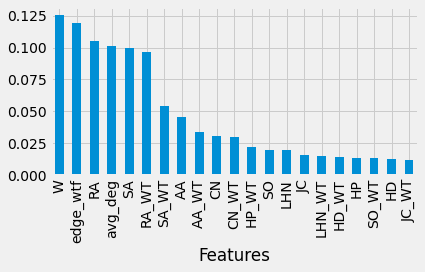

In [28]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2017 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2017/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2017 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2017


# Predicting Year : 2018

### Upload Weighted Temporal Dataset

In [89]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,5.673,1.708,2127.190,262.476,2.188,1.823,0.995,0.002,22.487,22.487,1.989,2972.000
1,6.133,1.846,2403.414,294.904,2.473,1.665,0.995,0.002,24.661,24.661,1.990,3004.000
2,4.036,1.215,1886.737,229.741,2.043,1.941,0.995,0.002,17.364,17.364,1.991,2785.000
3,4.650,1.400,2096.511,255.846,2.157,1.848,0.995,0.002,20.506,20.506,1.991,2923.500
4,5.865,1.766,2271.200,277.453,2.337,1.732,0.995,0.002,21.477,21.477,1.989,2862.000


In [4]:
X_WT_train.shape

(4294392, 12)

### Upload Unweighted non-Temporal Dataset

In [90]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,2927,303.526,0.986,0.984,0.970,0.000,4.412,4.412,0.985
1,2955,307.203,0.995,0.973,0.968,0.000,4.556,4.556,0.984
2,2567,261.384,0.987,0.864,0.855,0.000,3.387,3.387,0.922
3,2836,292.529,0.986,0.955,0.942,0.000,4.090,4.090,0.970
4,2697,277.176,0.979,0.908,0.891,0.000,3.855,3.855,0.942


In [6]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(5621150, 16)

In [7]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(5621150, 16)

In [8]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(4294392, 16)

In [9]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(4294392, 16)

In [10]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [11]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [ ]:
len(G.nodes())

In [ ]:
len(H.nodes())

In [ ]:
len(G.edges())

In [ ]:
len(H.edges())

In [12]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

4011188

In [ ]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2018/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

### Merge Datasets

In [91]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [92]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  1076339
Negative_samples:  533623


### upsample minority class

In [ ]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=272827,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [93]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [94]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [95]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 4})

### Train and predict

In [96]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20)

In [97]:
prediction = classifier.predict(X_test)

In [98]:
prediction.shape

(1833248,)

In [99]:
np.unique(prediction)

array([0, 1])

In [100]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.728
1,Precision,0.689
2,Recall,0.989
3,FPR,0.654
4,FNR,0.011
5,F1,0.812


'Feature Importance'

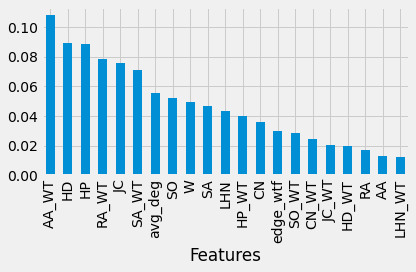

In [101]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2018 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2018/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2018 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2018


# Predicting Year : 2019

### Upload Weighted Temporal Dataset

In [29]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)

training_WT_df['avg_deg'] = (training_WT_df['deg_e1']+training_WT_df['deg_e2'])/2
training_WT_df = training_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_WT_df = training_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
training_WT_df = training_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})

X_WT_train = training_WT_df.iloc[:,2:-1]
Y_train = training_WT_df.iloc[:]['label']

X_WT_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)

testing_WT_df['avg_deg'] = (testing_WT_df['deg_e1']+testing_WT_df['deg_e2'])/2
testing_WT_df = testing_WT_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_WT_df = testing_WT_df[['e1','e2','edge_wtf','W','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]
testing_WT_df = testing_WT_df.rename(columns={"CN": "CN_WT", "AA": "AA_WT", "HP": "HP_WT", "HD": "HD_WT", "JC": "JC_WT", "LHN": "LHN_WT",
                  "RA": "RA_WT", "SA": "SA_WT", "SO": "SO_WT"})


X_WT_test = testing_WT_df.iloc[:,2:-1]
Y_test = testing_WT_df.iloc[:]['label']

X_WT_test.head()

,edge_wtf,W,CN_WT,AA_WT,HP_WT,HD_WT,JC_WT,LHN_WT,RA_WT,SA_WT,SO_WT,avg_deg
0,1.899,0.549,1708.032,194.985,4.341,1.288,0.994,0.003,9.047,9.047,1.987,2529.500
1,2.060,0.595,2651.059,296.884,6.738,1.166,0.994,0.003,12.877,12.877,1.988,2657.500
2,1.849,0.535,1510.486,170.146,3.839,1.342,0.994,0.003,7.135,7.135,1.989,2369.000
3,1.953,0.565,1729.305,198.571,4.395,1.283,0.993,0.003,9.745,9.745,1.986,2607.500
4,1.999,0.578,2101.484,237.727,5.341,1.221,0.994,0.003,10.557,10.557,1.988,2534.500


In [31]:
X_WT_train.shape

(1833248, 12)

### Upload Unweighted non-Temporal Dataset

In [32]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)

training_non_df = training_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_non_df = training_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]

X_non_train = training_non_df.iloc[:,2:-1]
#Y_train = training_df.iloc[:]['label']

#X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)

testing_non_df = testing_non_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_non_df = testing_non_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','label']]


X_non_test = testing_non_df.iloc[:,2:-1]
#Y_test = testing_df.iloc[:]['label']

X_non_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO
0,2077,201.736,0.992,0.701,0.697,0.000,1.866,1.866,0.821
1,2093,203.757,1.000,0.650,0.650,0.000,1.934,1.934,0.788
2,2032,196.616,0.970,0.769,0.751,0.000,1.759,1.759,0.858
3,2092,203.625,0.999,0.670,0.670,0.000,1.929,1.929,0.802
4,2081,202.271,0.994,0.699,0.696,0.000,1.887,1.887,0.821


In [33]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/test/dataframe.csv", newline='') as csvfile:
    testing_non_df = pd.read_csv(csvfile)
testing_non_df.shape

(2604893, 16)

In [34]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/test/dataframe.csv", newline='') as csvfile:
    testing_WT_df = pd.read_csv(csvfile)
testing_WT_df.shape

(2604893, 16)

In [35]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/train/dataframe.csv", newline='') as csvfile:
    training_WT_df = pd.read_csv(csvfile)
training_WT_df.shape

(1833248, 16)

In [36]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/train/dataframe.csv", newline='') as csvfile:
    training_non_df = pd.read_csv(csvfile)
training_non_df.shape

(1833248, 16)

In [37]:
from networkx.readwrite import json_graph
G_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/test/Graph.json"
g = utilities.read_json(G_addr)
G = json_graph.node_link_graph(g)

In [38]:
H_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/test/Graph.json"
h = utilities.read_json(H_addr)
H = json_graph.node_link_graph(h)

In [39]:
len(G.nodes())

3229

In [40]:
len(H.nodes())

3229

In [41]:
len(G.edges())

1833248

In [42]:
len(H.edges())

1833248

In [43]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

4146759

In [44]:
disconnection_addr = "/home/c6/Desktop/OpenWPM/jsons/Prediction_new/WT/2019/test/disconnect.json"
disconnection = utilities.read_json(disconnection_addr)
len(disconnection)

4146759

### Merge Datasets

In [45]:
training_frames = [X_WT_train, X_non_train]
testing_frames = [X_WT_test, X_non_test]

X_train = pd.concat(training_frames,axis=1)
X_test = pd.concat(testing_frames,axis=1)

In [46]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  1312869
Negative_samples:  520379


### upsample minority class

In [36]:
# Separate majority and minority classes
training_df_cat = [X_train, Y_train]
training_df = pd.concat(training_df_cat,axis=1)

df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=4340200,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,0:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [47]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)):
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [48]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm

### 1. Random Forest

In [49]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=20, criterion="entropy", class_weight={0: 1, 1: 15})

### Train and predict

In [109]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 1, 1: 15}, criterion='entropy',
                       max_depth=20, n_estimators=30)

In [110]:
prediction = classifier.predict(X_test)

In [111]:
prediction.shape

(2604893,)

In [112]:
np.unique(prediction)

array([0, 1])

In [113]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.930
1,Precision,0.951
2,Recall,0.942
3,FPR,0.091
4,FNR,0.058
5,F1,0.947


'Feature Importance'

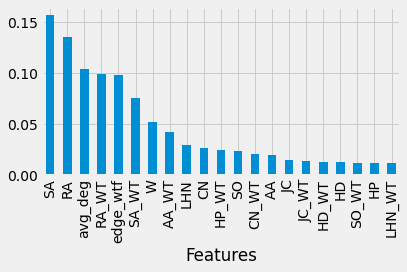

In [14]:
columns = ['edge_wtf', 'W', 'CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg',
           'CN_WT', 'AA_WT', 'HP_WT', 'HD_WT', 'JC_WT', 'LHN_WT', 'RA_WT', 'SA_WT', 'SO_WT']
feature_importance(columns, classifier)

### build the predicted Graph

In [ ]:
joblib.dump(classifier, "./random_forest.joblib")

### build the predicted Graph

In [ ]:
real_graph_2019 = json_graph.node_link_graph(
            utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2019/Graph.json"))

concat_pred = [testing_WT_df.iloc[:,0:2],X_test, pd.Series(prediction)]
predicted_graph_2019 = pd.concat(concat_pred,axis=1)


In [ ]:
predicted_graph_2019

## Train a Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(2, activation = tf.nn.softmax)])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoc_end(self, epoch, logs={}):
        if (logs.get('loss')<0.4):
            print("Reached 90% accuracy so canceling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallback()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='Recall')

In [ ]:
model.fit(X_train, Y_train, epochs=5, callbacks=[callbacks])

In [ ]:
model.evaluate(X_test, Y_test)